In [1]:
import torch
import datasets, networks, sampling, completion, evaluation
import matplotlib.pyplot as plt
from torch import nn

In [3]:
num_units = 8000
num_layer = 4
ordering=range(1,785) 
input_feat=28*28
MADE = networks.MADE(num_layer=num_layer, num_units=num_units, ordering=ordering, input_feat=input_feat)

stae_dict = torch.load("MADE.pth")
MADE.load_state_dict(stae_dict)

<All keys matched successfully>

In [5]:
ds = datasets.Dataset('mnist', batch_size=64)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

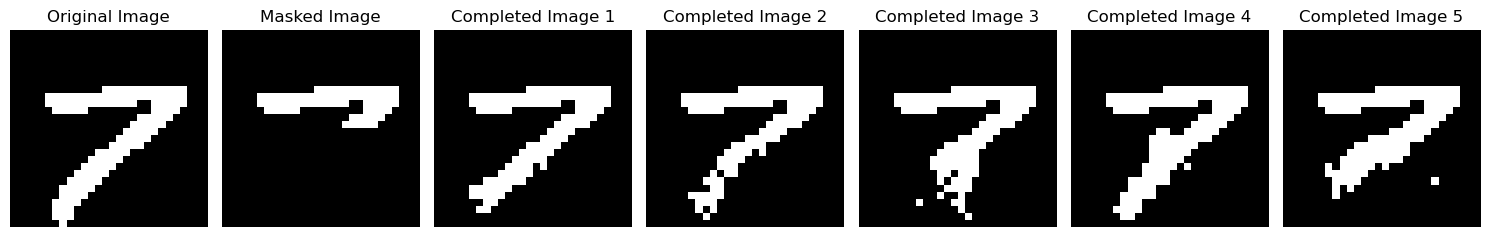

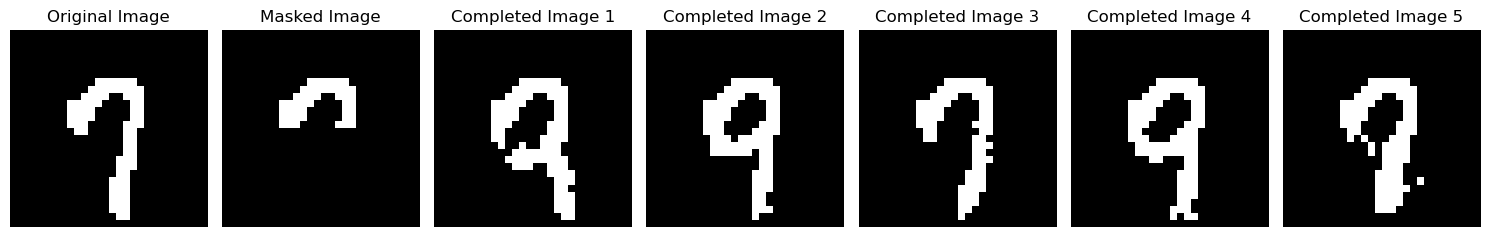

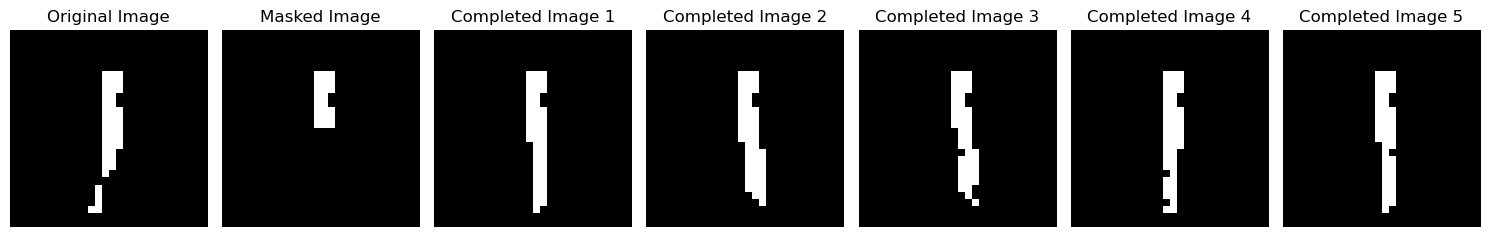

In [8]:
for i in range(3):
    original_img = completion.get_random_image(ds)
    masked_img, mask = completion.mask_image(original_img)
    completed_img = completion.complete(MADE, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)